**Inaugural Project - Niels and Kerem**

## Question 1

In [2]:
from types import SimpleNamespace # new? explained below
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#i

mp ={'y':1,'p':0.2,'theta':-2}

def utility(z,mp):
    return (z**(1+mp['theta']))/(1+mp['theta'])

def premium(q,mp):
    return mp['p']*q

def exp_value(i,q,mp):
    z1 = mp['y']-i+q-premium(q,mp)
    z2 = mp['y']-premium(q,mp)
    return mp['p']*utility(z1,mp)+(1-mp['p'])*utility(z2,mp)

def opt_q(i,mp):
    from scipy import optimize
    obj = lambda q: -exp_value(i,q,mp)
    solution = optimize.minimize_scalar(obj,bounds=(0,0.9),method='bounded') #Bounded
    q = solution.x
    return q

In [ ]:
#ii
for i in np.linspace(0.01,0.9,100):
    res = np.array(opt_q(i,mp))
    i = i
    print(res,i)

In [ ]:
#iii
result = []
ires = []
for i in np.linspace(0.01,0.9,100):
    res = np.array(opt_q(i,mp))
    i = i
    result.append(res)
    ires.append(i)
    print(result)

Text(0.5, 1.0, 'Correlation between x-values and q-values')

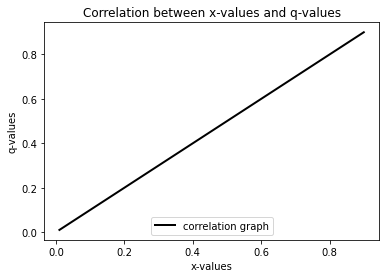

In [124]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ires,result, lw=2,color='black',label='correlation graph')
ax.set_xlabel('x-values')
ax.set_ylabel('q-values')
ax.legend(loc='lower center',frameon=True)
ax.set_title('Correlation between x-values and q-values')

Q2

In [7]:
#i
q_grid = np.linspace(0.01, 0.6, 100)

In [28]:
#ii
def utility(z):
    
    u = z**(1+(-2))/(1+(-2))
    return u

def exp_value2(q,premium):
    
    return 0.2*utility(1.0-0.6+q-premium) + (1-0.2)*utility(1.0-premium)

def acceptable(q,premium):

    dV = exp_value2(q,premium)-exp_value2(0,0)
    return dV

premium_guess = [0]
premium_results = [] #Empty list to save results
qs = []
old_premium = []

for q in q_grid:
    obj_premium = lambda premium: -acceptable(q, premium[0])
    res = optimize.root(obj_premium, premium_guess, method='broyden1')
    premium_results.append(res.x[0])
    qs.append(q)
    old_premium.append(0.2*q)

Text(0.5, 1.0, 'Correlation between x-values and q-values')

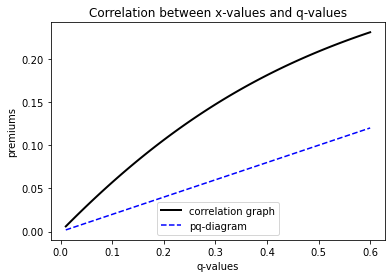

In [29]:
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.plot(qs,premium_results, lw=2,color='black',label='correlation graph')
ax2.plot(qs,old_premium, ls='--', color='blue',label='pq-diagram')
ax2.set_xlabel('q-values')
ax2.set_ylabel('premiums')
ax2.legend(loc='lower center',frameon=True)
ax2.set_title('Correlation between x-values and q-values')

Q3

In [54]:
#i

from scipy.stats import beta
a = 2
b = 7
N = 100000
y = 1
x = beta.rvs(a, b, size=N)
mp ={'y':1,'p':0.2,'theta':-2}

def utility(z,mp):
    return (z**(1+mp['theta']))/(1+mp['theta'])

def v(gamma,premium):
    z1 = mp['y']-(1-gamma)*x-premium
    z2 = mp['y']-premium
    return np.mean(mp['p']*utility(z1,mp)+(1-mp['p'])*utility(z2,mp))


print('First test is =', v(0.9,0.2))
print('Second test is =', v(0.45,0.1))

First test is = -1.257241049436496
Second test is = -1.1486373377432801


Q4

In [ ]:
from scipy.stats import beta
from scipy import optimize


mp ={'y':1,'p':0.2,'theta':-2, 'x':0.6, 'a':2, 'b':7, 'N':100000,'g':0.95}
x = beta.rvs(mp['a'], mp['b'], size=mp['N'])

def utility(z,mp):
    return (z**(1+mp['theta']))/(1+mp['theta'])

def v(premium):
    z1 = mp['y']-0.05*x-premium
    z2 = mp['y']-premium
    return np.mean(mp['p']*utility(z1,mp)+(1-mp['p'])*utility(z2,mp))

x_guess = [0] 
obj = lambda x: v(x[0])
res = optimize.root(obj,x_guess,method='broyden1')
x = res.x[0]

In [ ]:
print(x